  
  ---
    

## 4. graphlib - 그래프와 유사한 구조에 작동하는 기능

### 📍 graphlib.TopologicalSorter은 위상정렬을 위한 클래스 입니다.
### 📍 그래프의 꼭짓점들을 변의 방향을 거스르지 않고 나열하는것을 의미하며, 싸이클이 없는 그래프여야 합니다.  
  
  
  
### 예시 )

#### 영어초급, 영어중급, 영어고급, 영어문법, 영어회화  
#### 위의 5가지 과목을 순서를 지켜 수업을 들어야한다고 한다.  
  
  
* <b>규칙1</b> : 영어초급 -> 영어중급 -> 영어고급
* <b>규칙2</b> : 영어중급 -> 영어문법 -> 영어고급
* <b>규칙3</b> : 영어문법 -> 영어회화  
  
#### Q. 5가지 과목을 어떤 순서로 수강해야 할까요?

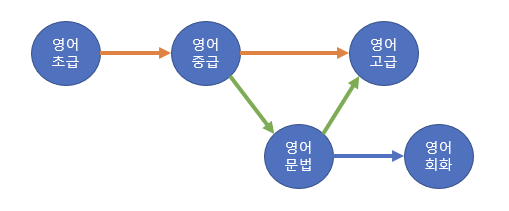

#### 이 때, graphlib의 TopologicalSorter을 사용하면 편리합니다.

In [1]:
from graphlib import TopologicalSorter

ts = TopologicalSorter()

# 규칙1
ts.add('영어중급', '영어초급')  # 영어중급의 선수과목은 영어초급
ts.add('영어고급', '영어중급')  # 영어고급의 선수과목은 영어중급

# 규칙2
ts.add('영어문법', '영어중급')  # 영어문법의 선수과목은 영어중급
ts.add('영어고급', '영어문법')  # 영어고급의 선수과목은 영어문법

# 규칙3
ts.add('영어회화', '영어문법')  # 영어회화의 선수과목은 영어문법

print(list(ts.static_order()))  # 위상정렬한 결과를 출력

['영어초급', '영어중급', '영어문법', '영어고급', '영어회화']


####  📍 핵심인 **add(노드, *선행노드)** 함수는 어떤 노드의 선행노드를 추가할 때 사용하는 함수입니다.  
#### 📍 선행노드는 1개 이상도 가능하며, ts.add('영어고급' ,  '영어중급' ,  '영어문법') 처럼 사용 가능합니다.

#### 하지만 만약에, 영어문법 -> 영어회화 -> 영어중급 순으로 구간이 순화하게 된다면, 

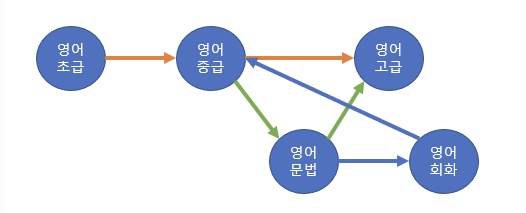

In [11]:
from graphlib import TopologicalSorter

ts = TopologicalSorter()

# 규칙1
ts.add('영어중급', '영어초급')
ts.add('영어고급', '영어중급')

# 규칙2
ts.add('영어문법', '영어중급')
ts.add('영어고급', '영어문법')

# 규칙3
ts.add('영어중급', '영어회화')   #### 변경된 구간 --> cycle이 형성됨####
ts.add('영어회화', '영어문법')

print(list(ts.static_order()))  # 위상정렬한 결과를 출력

CycleError: ('nodes are in a cycle', ['영어중급', '영어문법', '영어회화', '영어중급'])

#### - 출처 : https://wikidocs.net/106237